<a href="https://colab.research.google.com/github/GuyWhoCodesThings/GuyWhoCodesThings/blob/main/MaxPoolingFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from skimage.measure import block_reduce
from skimage.measure import block_reduce
from skimage.util import view_as_blocks
import numpy.ma as ma
from matplotlib import pyplot
import random

In [25]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [26]:
train_X.shape

(60000, 28, 28)

In [27]:
def forward_prop(image, block_size):
  image = image / 255.
  image_max = block_reduce(image, block_size=(block_size, block_size), func=np.max) #array for foward propagatoin of Max Pooling
  blocks_arr_length = image_max.shape[0] * image_max.shape[0]
  return image_max

def backward_prop(array, width, height, block_size):
  block_array = view_as_blocks(array,(block_size,block_size))
  block_array = block_array.reshape(width,height)
  max_indices = np.argmax(block_array, axis=1)
  max_indices = np.expand_dims(max_indices,axis=1)
  grad_arr = np.zeros_like(block_array)
  np.put_along_axis(grad_arr, max_indices, 1, axis=1)
  grad_arr = grad_arr.reshape(-1,block_size,block_size)
  

  return undo_blocks(grad_arr, width, height, block_size)

def undo_blocks(array, width, height, block_size):
  ordered_blocks = array.reshape(-1,block_size,block_size)
  #splits every block horizontally in half
  split_blocks = np.array(np.hsplit(ordered_blocks,block_size))
  #splits array of blocks evenly with respect to the original image length and block size
  split_blocks = np.array(np.hsplit(split_blocks, (width / block_size)))
  #reshape array to get it into a sqaure shape like orignal image matrix
  reshaped_arr = split_blocks.flatten().reshape(width,height)
  return reshaped_arr

In [28]:
current_image = train_X[random.randint(0,10000)]

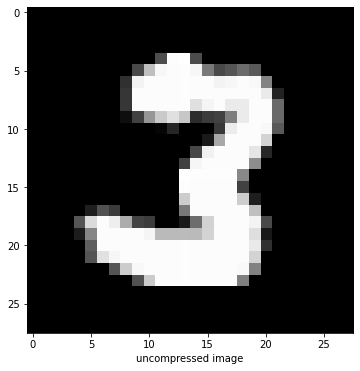

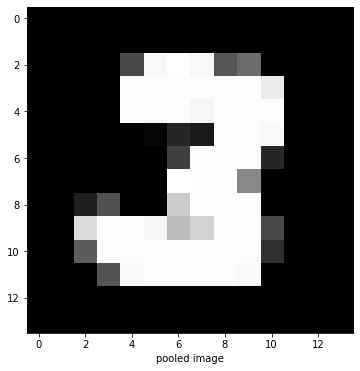

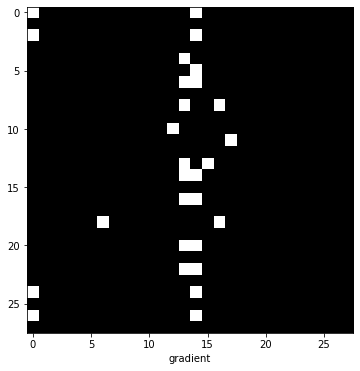

In [29]:
current_image = train_X[random.randint(0,10000)]
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel('uncompressed image')
pyplot.imshow(current_image, cmap=pyplot.get_cmap('gray'))
pyplot.show()
plt.xlabel('pooled image')
pyplot.imshow(forward_prop(current_image,2), cmap=pyplot.get_cmap('gray'))
pyplot.show()
plt.xlabel('gradient')
pyplot.imshow(backward_prop(current_image,28,28,2), cmap=pyplot.get_cmap('gray'))
pyplot.show()
